# Project - Neural Networks #

In [71]:
# Loading all the required packages:-

import pandas as pd
import dill # To save the current python session
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import category_encoders as ce
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE # Imbalanced learn library
from sklearn.ensemble import RandomForestClassifier


############################# FIRST DATAFRAME ###################################


In [ ]:
# Loading the DataFrame:-
df=pd.read_csv("/Users/ruthvikrajam.v/Desktop/Neural Networks/Project/Datasets/Customer_Churn.csv");



In [5]:
# Tenure (In months) -> It tells how long a particular customer is using the service provider

sample=df.sample(5); # Prints sample data
print(sample);

      customerID gender  SeniorCitizen Partner Dependents  tenure  \
4122  4632-XJMEX   Male              0      No        Yes      53   
2041  3546-GHEAE   Male              0      No         No       7   
7014  9053-EJUNL   Male              0      No         No      41   
2542  4826-DXMUP   Male              0      No        Yes      35   
5944  5995-OIGLP   Male              0      No         No      12   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
4122          Yes            No             DSL                  Yes  ...   
2041          Yes            No              No  No internet service  ...   
7014          Yes           Yes     Fiber optic                   No  ...   
2542          Yes            No             DSL                   No  ...   
5944          Yes            No             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
4122                   No                  Yes     

In [6]:

# From the Dataframe, it is clear that the customerID is not useful so dropping the column customerID:-

df.drop("customerID",axis="columns",inplace=True);

df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# The TotalCharges is of type "object" but it has to be "integer" type

df["TotalCharges"].values # The values are of type ->  "string"
df["MonthlyCharges"].values # whereas here the values are of type -> "int"



array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:

# Converting the TotalCharges feature into "int" type:-

pd.to_numeric(df["TotalCharges"], errors="coerce")

# The above function will convert it into numeric and also if there are NA values, those values are not 
 # considered

# Extracting all the rows with TotalCharges -> NULL
df1=df[pd.to_numeric(df["TotalCharges"], errors="coerce").isnull()]
df1.shape # -> 11 rows with NULL values

df2=df[df.TotalCharges!=" "]

df2.dtypes



gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df2.TotalCharges=pd.to_numeric(df2.TotalCharges)

# To check if there are any NULL values in the Dataset
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Analysis:-

### Churn -> No[Not Leaving], Yes[Leaving the service provider]

Text(0.5, 1.0, 'Customer Churn Analysis using Tenure')

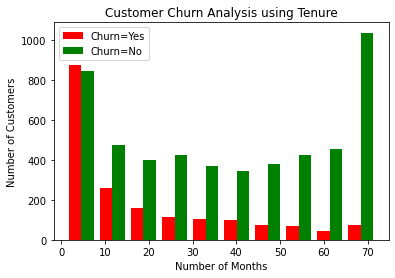

In [10]:

tenure_churn_no=df2[df2["Churn"]=="No"].tenure # Not leaving the Company

tenure_churn_yes=df2[df2["Churn"]=="Yes"].tenure # Leaving the Company

plt.hist([tenure_churn_yes, tenure_churn_no], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis using Tenure")

Text(0.5, 1.0, 'Customer Churn Analysis using Monthly Charges')

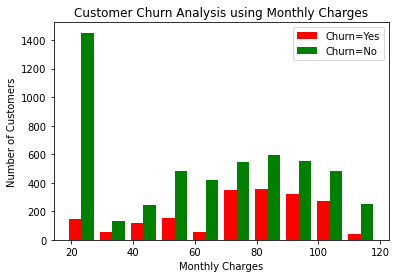

In [11]:
# From the above graph, it is clear that the customers with tenure period more than 50 months are less likely to churn 
 # from the company whereas customers with tenure period less than 10 months are more likely to churn from the company
 
MonthlyCharges_churn_no=df2[df2["Churn"]=="No"].MonthlyCharges # Not leaving the Company

MonthlyCharges_churn_yes=df2[df2["Churn"]=="Yes"].MonthlyCharges # Leaving the Company

plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis using Monthly Charges")

In [12]:
# From the above graph it is clear that the customers who are paying very less and high monthly charges are not leaving the company
 # whereas the customers who are paying Monthly Charges around $70 - $100 are having 50-50 chances of leaving the company

# The following program prints unique values in each column:-
for column in df2:
    print(column , df2[column].unique())

def print_unique_col_values(df):
   for column in df:
       if df[column].dtypes=="object":
               print(column, df[column].unique())
        
print_unique_col_values(df2);


gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   

In [13]:
# Replacing "No internet service" and "No phone service" with "No":-
 
df2.replace("No internet service", "No", inplace=True);
df2.replace("No phone service", "No", inplace=True);

print_unique_col_values(df2);


gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
# Now let us analyze all the columns with values "Yes" (or) "No":-
# Since ML algorithms dont know categorical values, replacing "Yes" and "No" with 1 and 0:-
# "Not leaving the company -> 0 and Leaving the company -> 1. 

yes_no_columns=["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity",
"OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in yes_no_columns:
    df2[col].replace({"Yes":1, "No":0}, inplace=True);
    
df3=pd.get_dummies(data=df2, columns=["InternetService", "Contract", "PaymentMethod"]);    
df3.columns

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [15]:
# Let us give for Male = 0, Female = 1

df3.replace({"Male":0, "Female":1}, inplace=True); 

df3.dtypes # Now, all columns are of integer type


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [16]:
# Scaling the Dataset:-
# tenure, MonthlyCharges and TotalCharges has to be scaled whereas the range of remaining
 # columns are between 0 and 1:

cols_to_scale=["tenure", "MonthlyCharges", "TotalCharges"];
scaler=MinMaxScaler() # Creating an object for MinMaxScaler
     
df4=df3.copy();
df4[cols_to_scale]=scaler.fit_transform(df4[cols_to_scale]);

In [17]:
# Splitting the Dataset for training and testing:-

X=df4.drop("Churn", axis="columns");
y=df4["Churn"];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5);


In [18]:
#### Machine Learning ####:-
# RandomForest Classifier #

rfc=RandomForestClassifier(n_estimators=100, n_jobs=-1, verbose=2, criterion="entropy");
rfc.fit(X_train, y_train);

print(accuracy_score(y_test, rfc.predict(X_test)));


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100

building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100building tree 29 of 100

building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100building tree 41 of 100

building tree 42 of 100bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s


building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100building tree 78 of 100

building tree 79 of 100building tree 80 of 100

building tree 81 of 100
building tree 82 of 100
building tree 83 of 100building tree 84 of 100

building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100building tree 95 of 100

building tree 96 of 100
building tree 97 of 100
building tree 98 of 100building tree 99 of 100

building tree 100 of 100
0.775408670931059


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [19]:
### KNN ###
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3 , n_jobs=-1);
knn.fit(X_train, y_train);

print(accuracy_score(y_test, knn.predict(X_test)));

0.7398720682302772


In [20]:
#### Neural Network ####:-

model=Sequential();

model.add(Dense(26, input_dim=X_train.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]);
model.fit(X_train, y_train, epochs=100);

test = [round(x[0]) for x in model.predict(X_test)];
print(accuracy_score(y_test, test)); # Training accuracy score of 84.5%


2021-12-15 19:26:35.310313: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.7083
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7703
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8009
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8064
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8100
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4071 - accura

In [21]:
print(classification_report(y_test, test));


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       999
           1       0.62      0.52      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.76      1407



In [ ]:
# From above it is clear that the model is not performing well for the class 1 i.e Customers leaving from the 
 #company so, to overcome this problem SMOTE method was implemented on the 2nd Dataset.
 

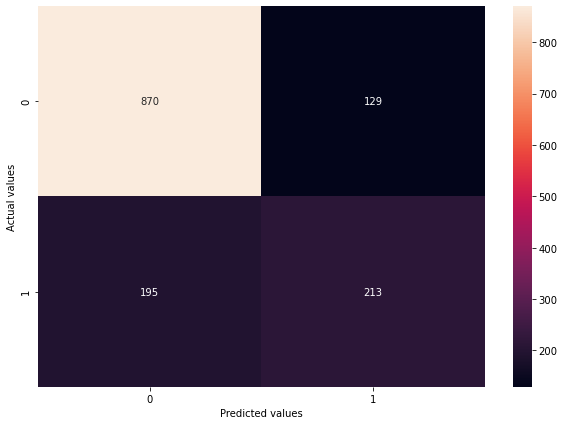

In [22]:
# Confusion Matrix:-

cm=tf.math.confusion_matrix(labels=y_test, predictions=test);

plt.figure(figsize=(10,7));
sns.heatmap(cm, annot=True, fmt="d");
plt.xlabel("Predicted values");
plt.ylabel("Actual values");


############################# SECOND DATAFRAME ###################################


In [116]:
# Importing the Datasets for train and test:-
# The test DataFrame is just for our reference to find the target value but doesn't consists of any output values.
train=pd.read_csv("/Users/ruthvikrajam.v/Desktop/Neural Networks/Project/Datasets/customer-churn-prediction-2020/train.csv");
test=pd.read_csv("/Users/ruthvikrajam.v/Desktop/Neural Networks/Project/Datasets/customer-churn-prediction-2020/test.csv");


In [117]:
# List of columns:-
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [118]:
# Shape of DataFrame:-
print(train.shape);

(4250, 20)


In [119]:
train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [120]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## DATA ANALYSIS ##:-

In [ ]:
#### Univariate Analysis ####:-

In [121]:
## Categorical Variables ##:-
# Storing all the categorical features
categorical_variables=[];
categorical_variables=[feature for feature in train.columns if train[feature].dtype=="O"];

# Function to calculate percentage for each feature:-
def calculate_percentage(total, ax):
    for patch in ax.patches:
        percentage="{}%".format(round(100*(patch.get_height()/total),1));
        x=patch.get_x()+(patch.get_width()/2);
        y=patch.get_height();
        ax.annotate(percentage, (x, y), ha="center");
    

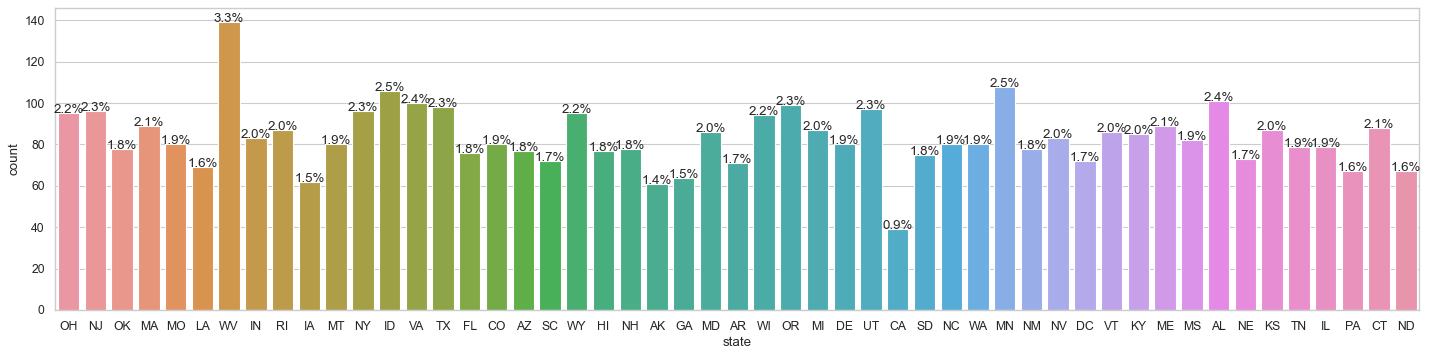

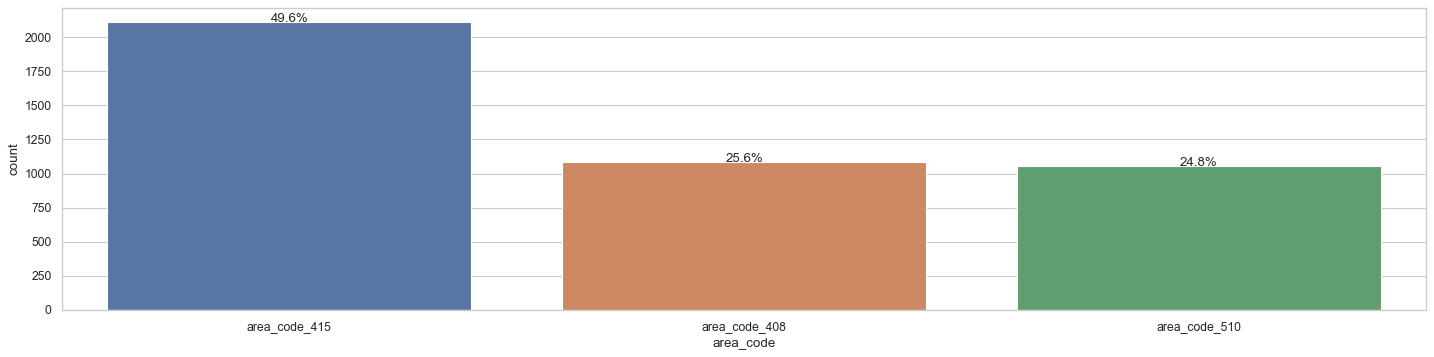

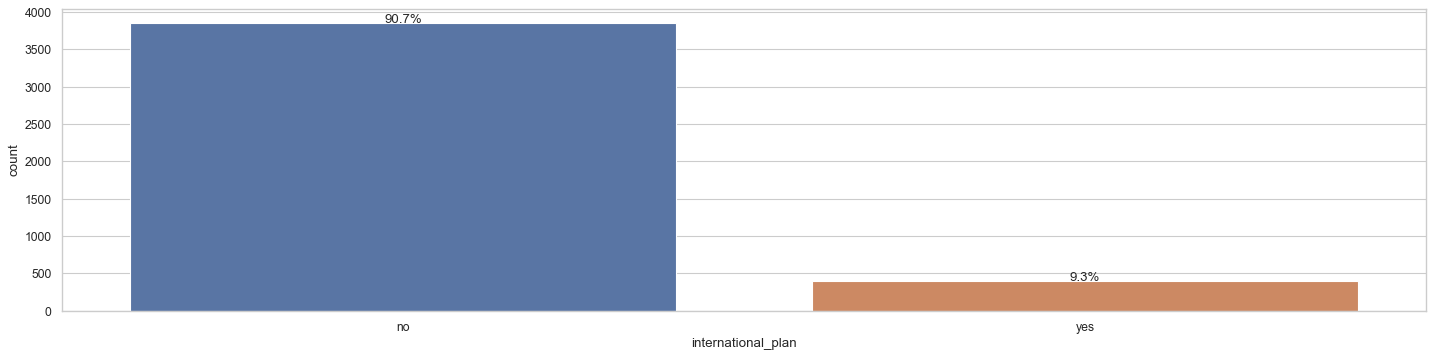

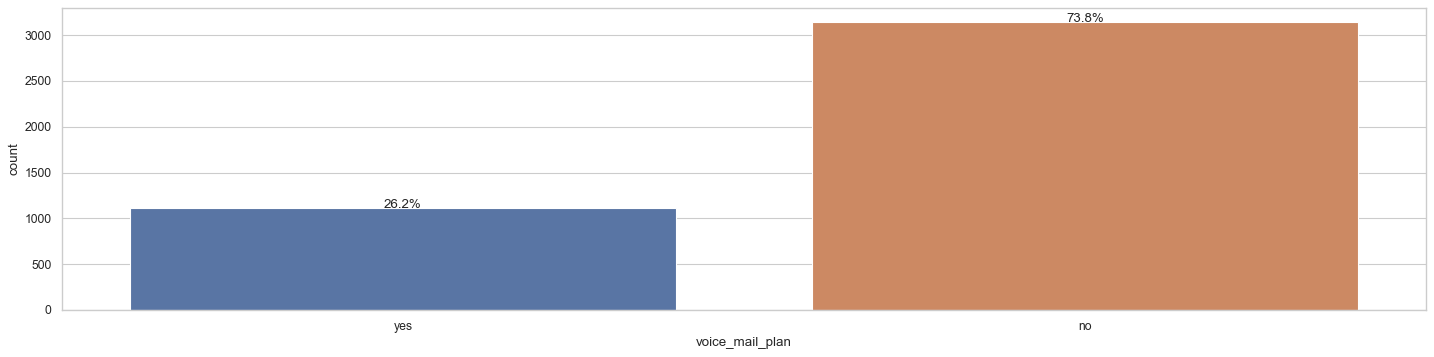

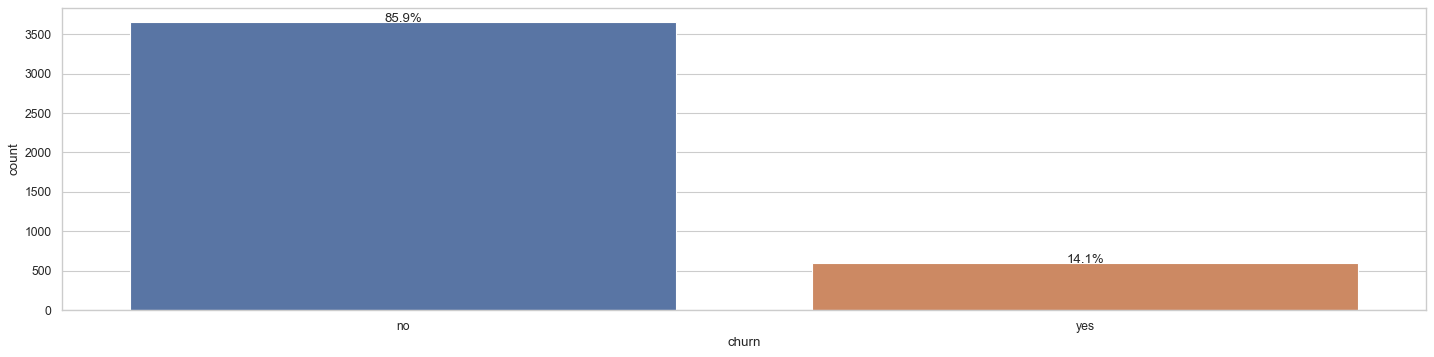

In [122]:
# Plotting countplot for each categorical variable by using the above function:-
for feature in categorical_variables:
    sns.set(style="whitegrid");
    plt.figure(figsize=(22,5), dpi=80);
    total=len(train);
    ax=sns.countplot(x=train[feature], data=train);
    calculate_percentage(total, ax);
    plt.show();

In [ ]:
# From above plots it is clear that:-
 # 90.7% of the customers don't have international plan
 # 73.8% of the customers don't have voice mail plan
 # 49.6% of the customers are staying at area code 415
 # Only 14.1% of the customers churn from the company


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


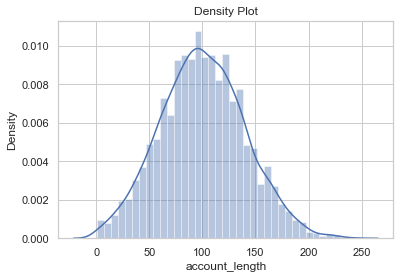

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


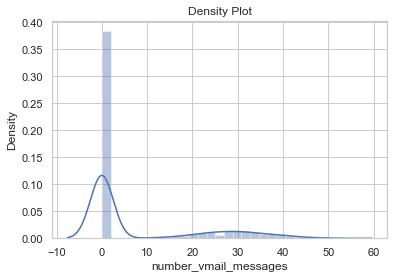

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


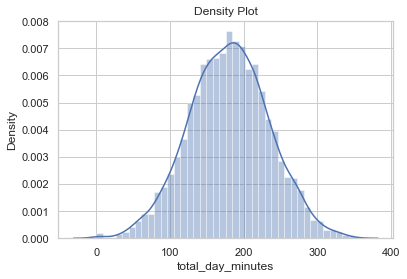

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


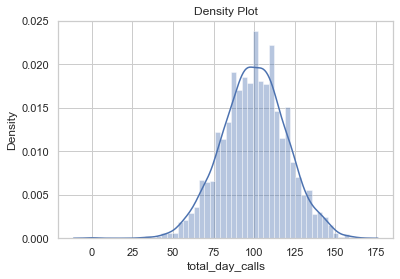

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


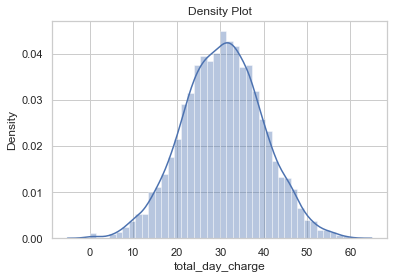

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


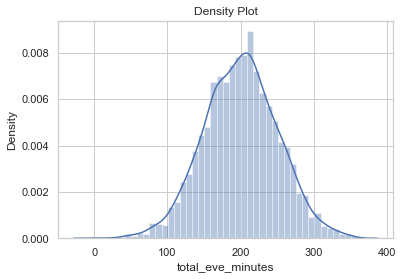

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


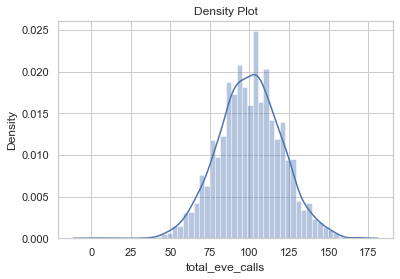

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


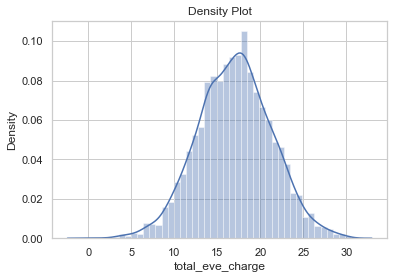

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


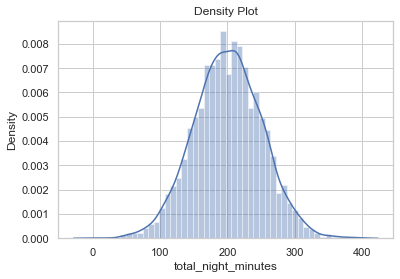

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


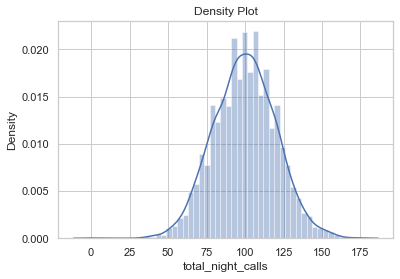

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


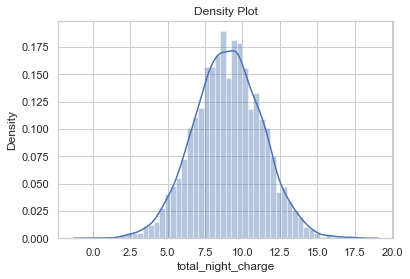

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


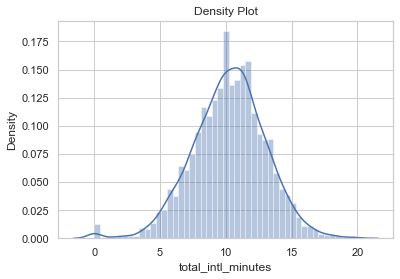

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


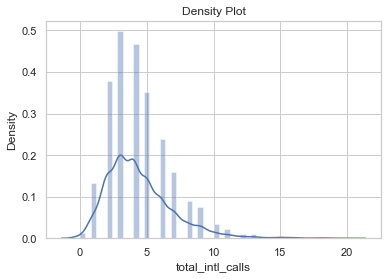

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


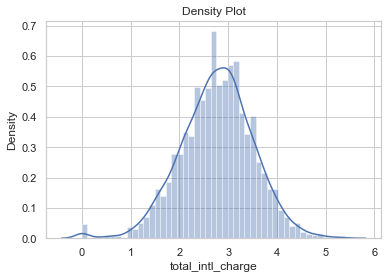

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


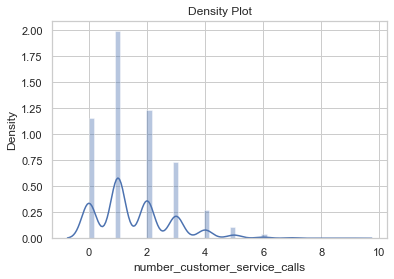

In [123]:
## Numerical Variables ##:-
# Storing all the numerical features
numerical_variables=[];
numerical_variables=[feature for feature in train.columns if train[feature].dtype!="O"];

# Plotting Density plots for each numerical variable by using the above function:-

for feature in numerical_variables:
    sns.distplot(train[feature]);
    plt.xlabel(feature);
    plt.ylabel("Density");
    plt.title("Density Plot");
    plt.show();

In [ ]:
# From the above graphs it is clear that:-
 # Few features are skewed means, they dont show Normal distribution
 # in the Dataset so, those features values has to be converted to Normal distribution.
 
# Features like number_customer_service_calls, total_intl_calls and number_vmail_messages don't show
 # Normal Distribution.


In [ ]:
#### Bivariate Analysis ####:-

/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


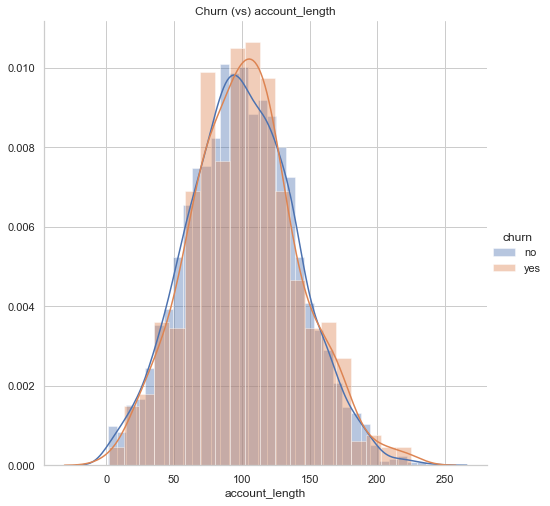

In [80]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "account_length").add_legend();
plt.title("Churn (vs) account_length");
plt.show();

In [ ]:
# From above it is clear that if "Account Length" is between 90 to 110 months, churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


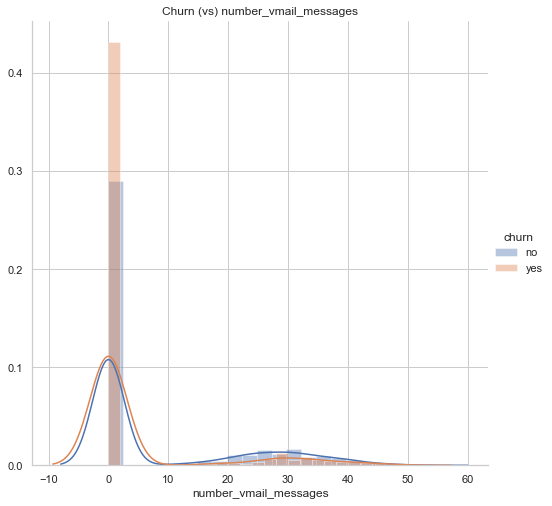

In [81]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "number_vmail_messages").add_legend();
plt.title("Churn (vs) number_vmail_messages");
plt.show();

In [ ]:
# From above it is clear that if "Number of voice mail messages" is equal to 0, churn rate is very high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


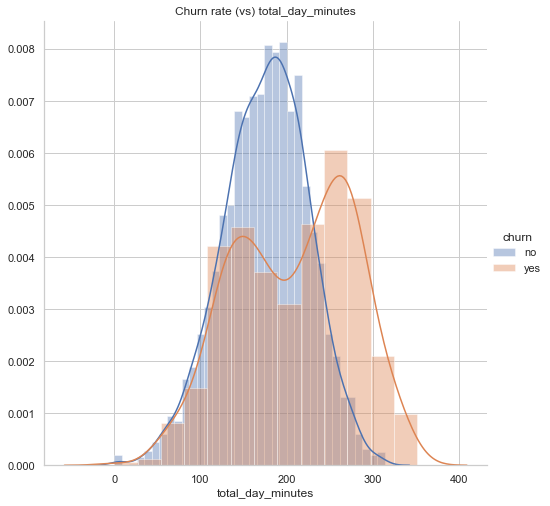

In [124]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_day_minutes").add_legend();
plt.title("Churn rate (vs) total_day_minutes");
plt.show();

In [ ]:
# From above it is clear that if "The total day minutes" is around 220 to 300 minutes then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


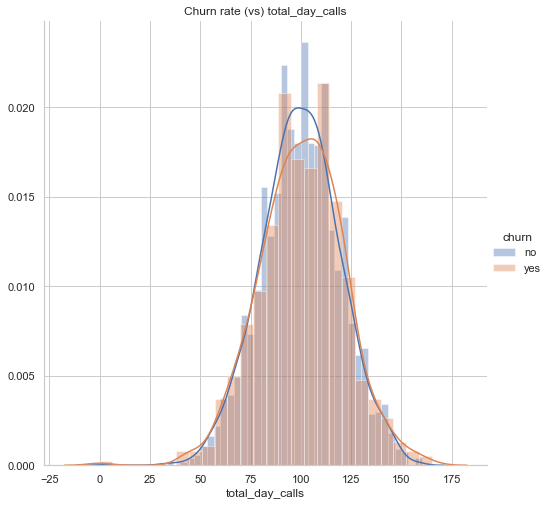

In [125]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_day_calls").add_legend();
plt.title("Churn rate (vs) total_day_calls");
plt.show();


In [ ]:
# From above it is clear that if "The total day calls" is between 85 to 115 times then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


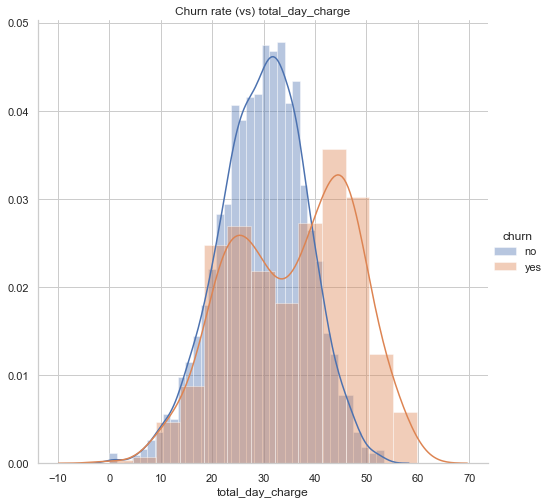

In [126]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_day_charge").add_legend();
plt.title("Churn rate (vs) total_day_charge");
plt.show();

In [ ]:
# From above it is clear that if "The total day charges" is between 42 to 48 then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


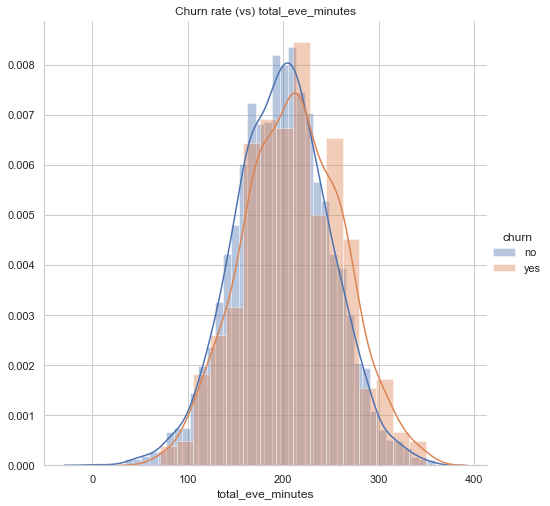

In [85]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_eve_minutes").add_legend();
plt.title("Churn rate (vs) total_eve_minutes");
plt.show();


In [ ]:
# From above it is clear that if "The total evening minutes" is between 200 to 250 minutes then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


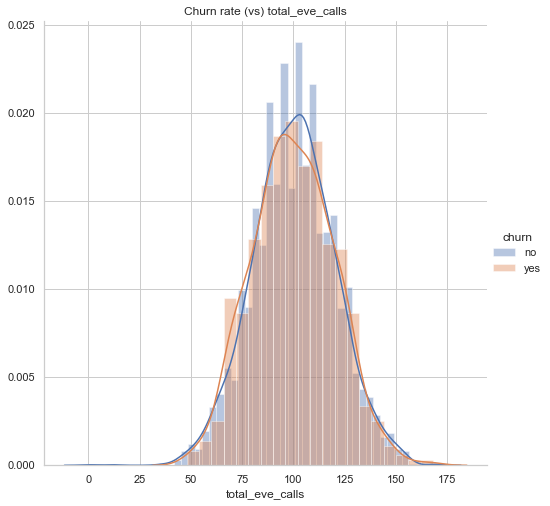

In [86]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_eve_calls").add_legend();
plt.title("Churn rate (vs) total_eve_calls");
plt.show();


In [ ]:
# From above it is clear thar if "The total evening calls" is between 80 to 110 times then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


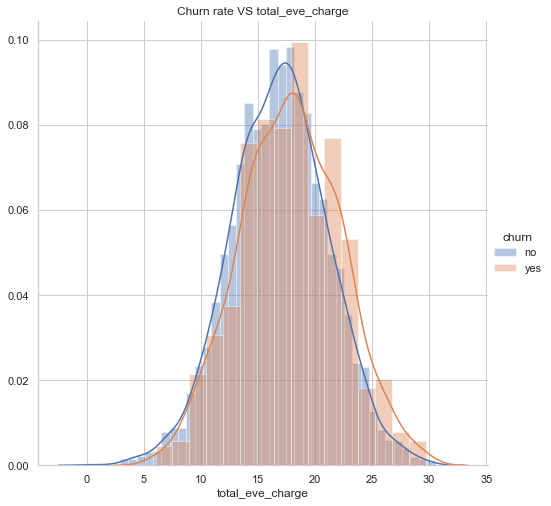

In [87]:
sns.FacetGrid(train, hue='churn',size=7).map(sns.distplot, 'total_eve_charge').add_legend()
plt.title('Churn rate VS total_eve_charge')
plt.show()


In [ ]:
# From above it is clear thar if "The total evening charges" is between 17 to 22 then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


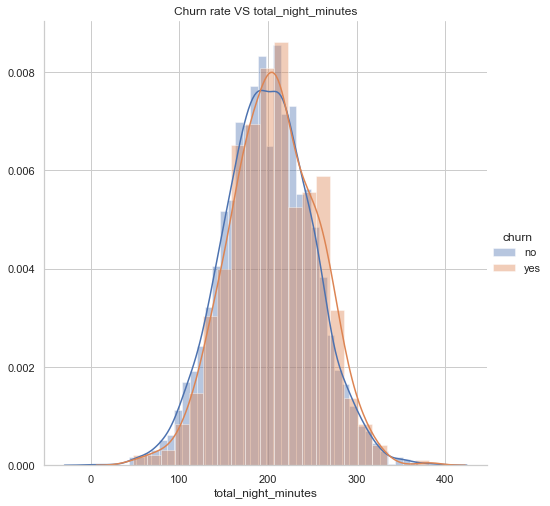

In [88]:
sns.FacetGrid(train, hue='churn',size=7).map(sns.distplot, 'total_night_minutes').add_legend()
plt.title('Churn rate VS total_night_minutes')
plt.show()

In [ ]:
# From above it is clear thar if "The total night minutes" is between 180 to 220 then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


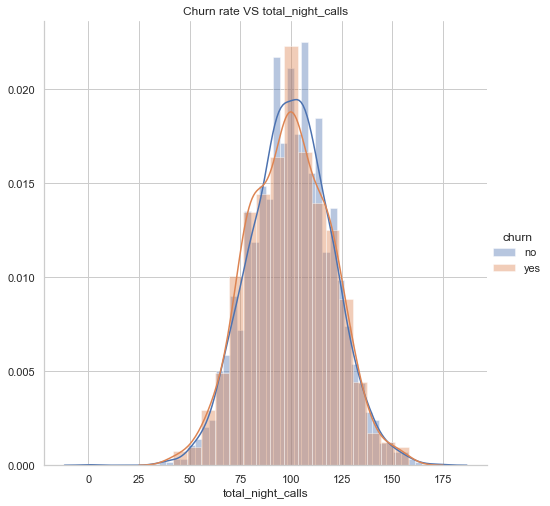

In [89]:
sns.FacetGrid(train, hue='churn',size=7).map(sns.distplot, 'total_night_calls').add_legend()
plt.title('Churn rate VS total_night_calls')
plt.show()

In [ ]:
# From above it is clear thar if "The total night calls" is between 90 to 110 then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


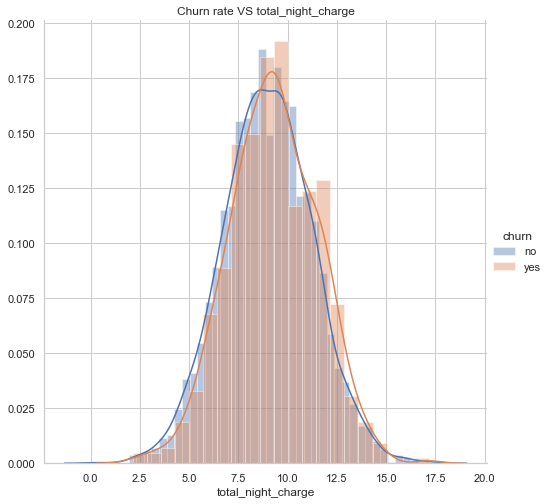

In [90]:
sns.FacetGrid(train, hue='churn',size=7).map(sns.distplot, 'total_night_charge').add_legend()
plt.title('Churn rate VS total_night_charge')
plt.show()


In [ ]:
# From above it is clear thar if "The total night charges" is between 8 to 11 then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


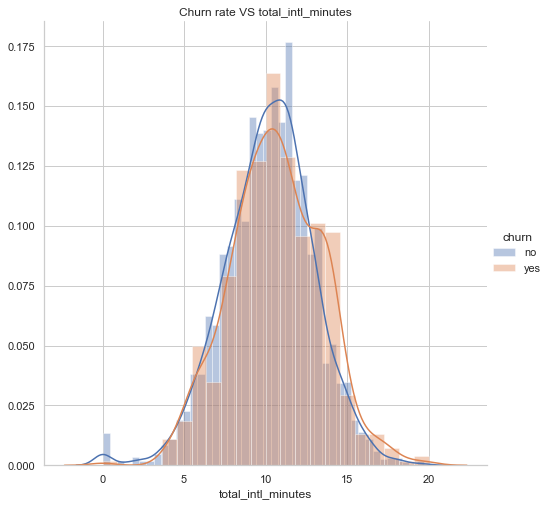

In [91]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_intl_minutes").add_legend()
plt.title("Churn rate VS total_intl_minutes");
plt.show();

In [ ]:
# From above it is clear thar if "The total international minutes" is between 8 to 12 then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


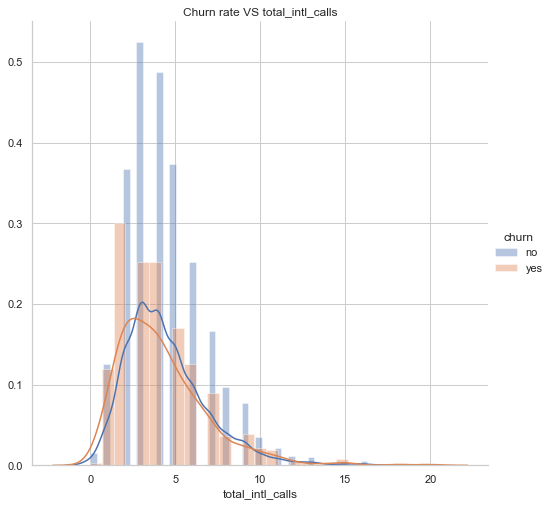

In [92]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_intl_calls").add_legend();
plt.title("Churn rate VS total_intl_calls");
plt.show();

In [ ]:
# From above it is clear thar if "The total international calls" is between 2 to 4 then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


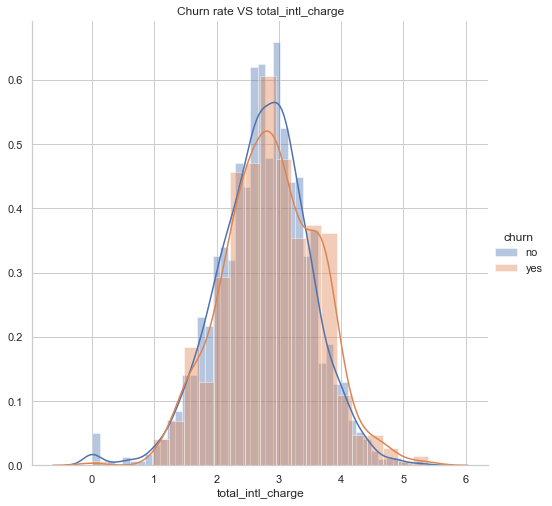

In [93]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "total_intl_charge").add_legend();
plt.title("Churn rate VS total_intl_charge");
plt.show();

In [ ]:
# From above it is clear thar if "The total international charge" is between 2.5 to 3 then the churn rate is high.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


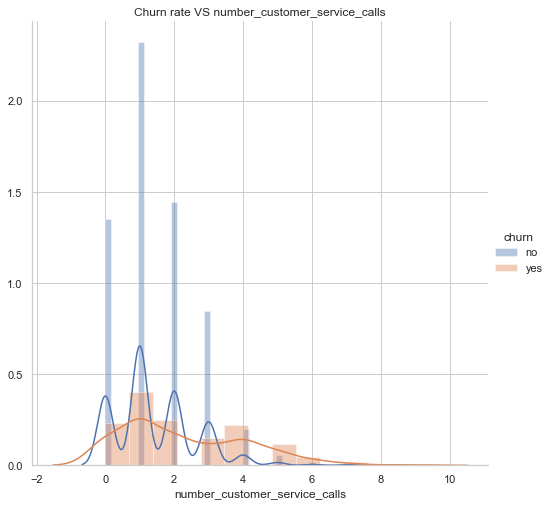

In [94]:
sns.FacetGrid(train, hue="churn", size=7).map(sns.distplot, "number_customer_service_calls").add_legend();
plt.title("Churn rate VS number_customer_service_calls");
plt.show();


In [ ]:
# From above it is clear thar if "The number of customer service calls" is 1 then the churn rate is high.


In [ ]:
#### Outliers ####:-

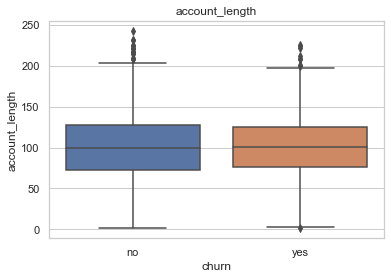

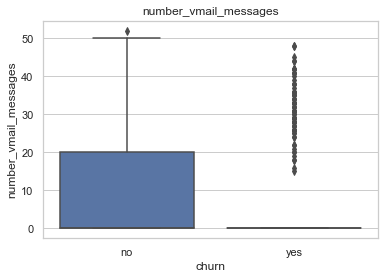

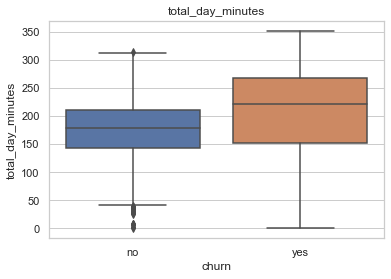

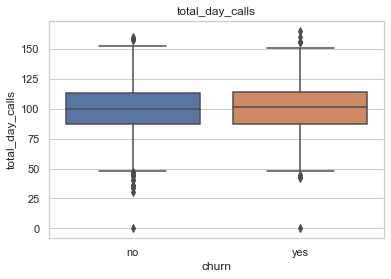

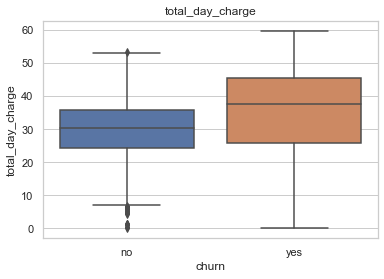

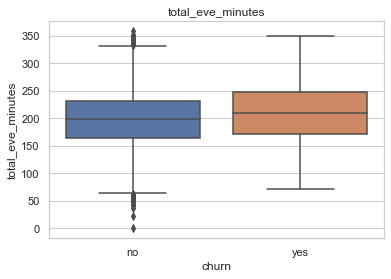

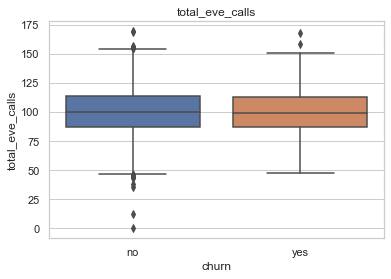

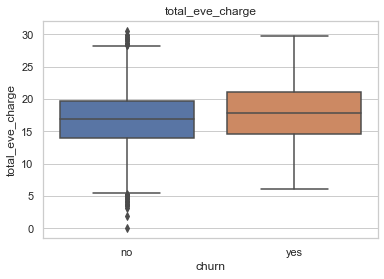

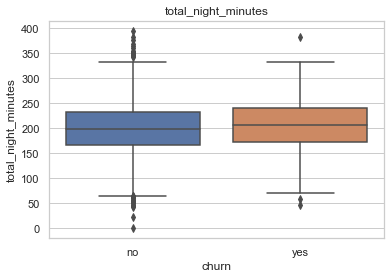

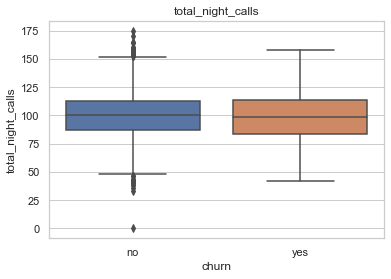

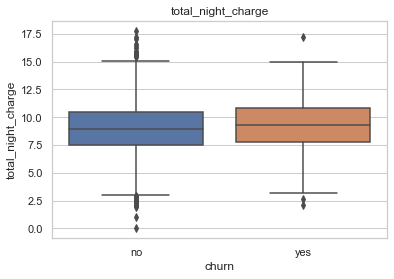

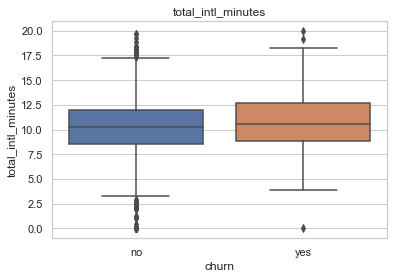

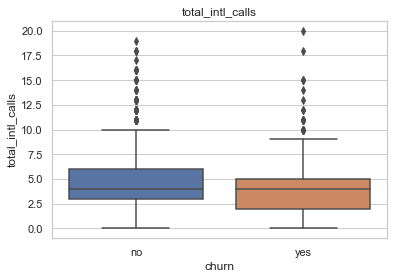

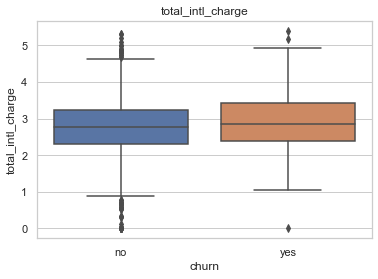

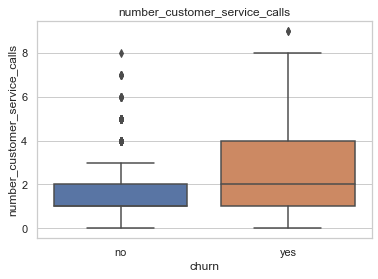

In [127]:
## Numerical features ##:-
# Seaborn gives better visualisation than pandas so, seaborn was used:-
for feature in numerical_variables:
    sns.boxplot(x="churn", y=feature, data=train);
    plt.title(feature);
    plt.show();

In [ ]:
# From above it is clear that:-
 # Every feature contains outliers so those outliers have to be removed.
 

In [128]:
# Replacing the outliers with their median values and storing it in a new DataFrame:- 
def eliminate_outliers(df, labels):
    for feature in labels:
        quantile1=df[feature].quantile(0.25);
        quantile2=df[feature].quantile(0.75);
        
        iqr=quantile2 - quantile1;
        upper_bound=quantile2 + 1.5*iqr;
        lower_bound=quantile1 - 1.5*iqr;
        
        df[feature]=df[feature].mask(df[feature]<lower_bound, df[feature].median(), axis=0);
        df[feature]=df[feature].mask(df[feature]>upper_bound, df[feature].median(), axis=0);
        
    return df;

train_eliminate_outliers=eliminate_outliers(train, numerical_variables);


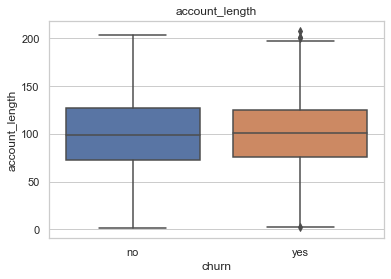

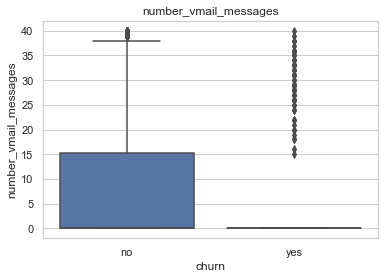

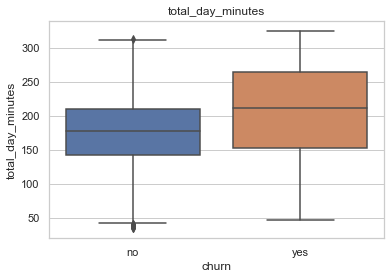

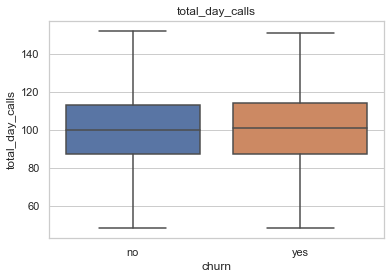

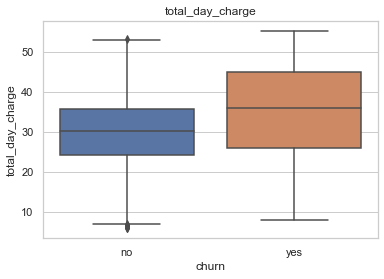

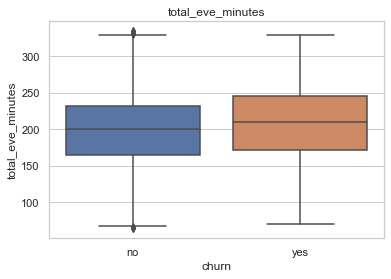

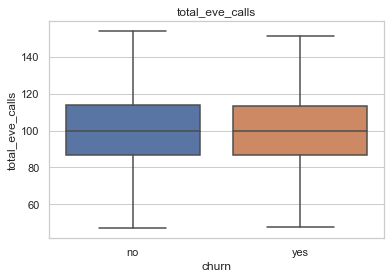

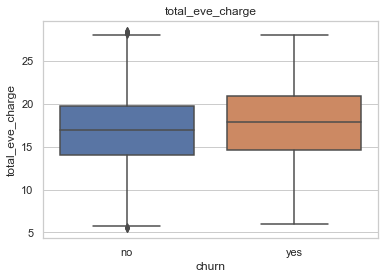

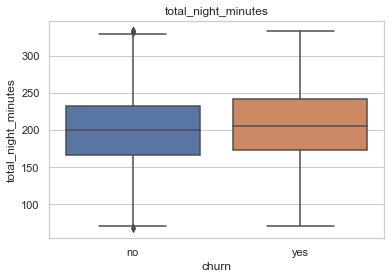

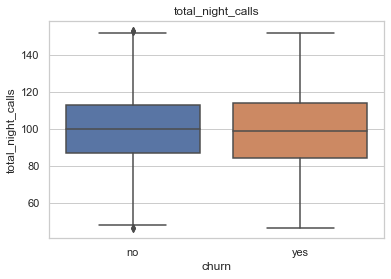

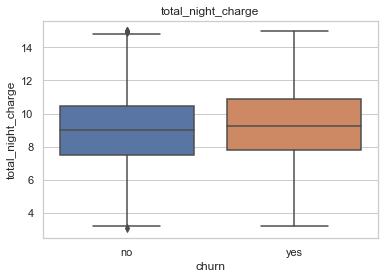

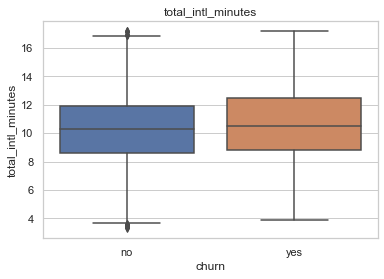

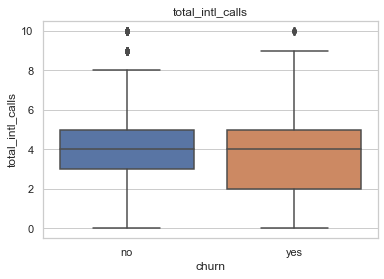

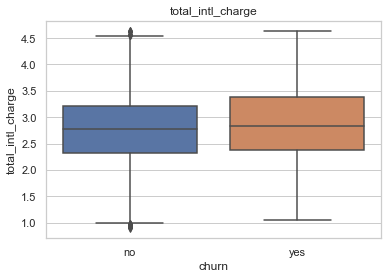

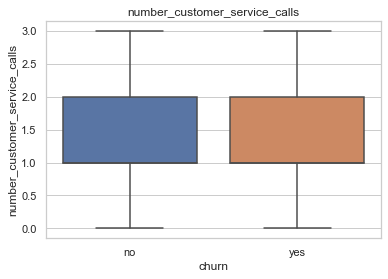

In [129]:
## Box plots after removing outliers ##

for feature in numerical_variables:
    sns.boxplot(x="churn", y=feature, data=train_eliminate_outliers);
    plt.title(feature);
    plt.show();

In [130]:
#### Handling Categorical features ####

# nunique() function is used to find the number of distinct values in a Column:-

train_eliminate_outliers["state"].nunique()

51

In [ ]:
# From above, it is clear that the state feature has 51 distinct values.
 
 # Thereby, if I implement One Hot Encoder on the state feature then it creates 51 different features and there is a chance
 # of Overfitting i.e categorical data can pose a serious problem if they have high cardinality which means too many unique
 # values.
 
 # So, to overcome this problem Hash Encoder is used.
  # (https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)


In [131]:
hash_object=ce.HashingEncoder(cols="state")

train_hash=hash_object.fit_transform(train_eliminate_outliers);
test_hash=hash_object.fit_transform(test);

train_hash.head() # If we put " ; " after the statement then the head() function doesn't works.


/Users/ruthvikrajam.v/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,17.06,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,17.06,212.6,118,9.57,7.5,7,2.03,3,no


In [132]:
#### Replacing "No" with 0 and "Yes" with 1 for categorical feature values:- ####

train_hash.international_plan.replace(["no", "yes"], [0, 1], inplace=True);
train_hash.voice_mail_plan.replace(["no", "yes"], [0, 1], inplace=True);
train_hash.churn.replace(["no", "yes"], [0, 1], inplace=True);

test_hash.international_plan.replace(["no", "yes"], [0, 1], inplace=True);
test_hash.voice_mail_plan.replace(["no", "yes"], [0, 1], inplace=True);

train_hash.head();

In [135]:
print(train_hash["churn"]);

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int64


In [136]:
## In the DF the area_code feature is of type "Object", need to convert to "Numerical" ##

train_hash=pd.get_dummies(train_hash, columns=["area_code"]);
train_hash.info();
 # Thereby the area_code feature has been converted to integer type from object type for train data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          4250 non-null   int64  
 1   col_1                          4250 non-null   int64  
 2   col_2                          4250 non-null   int64  
 3   col_3                          4250 non-null   int64  
 4   col_4                          4250 non-null   int64  
 5   col_5                          4250 non-null   int64  
 6   col_6                          4250 non-null   int64  
 7   col_7                          4250 non-null   int64  
 8   account_length                 4250 non-null   int64  
 9   international_plan             4250 non-null   int64  
 10  voice_mail_plan                4250 non-null   int64  
 11  number_vmail_messages          4250 non-null   int64  
 12  total_day_minutes              4250 non-null   f

In [137]:
test_hash=pd.get_dummies(test_hash, columns=["area_code"]);
test_hash.info();
# Thereby the area_code feature has been converted to integer type from object type for test data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          750 non-null    int64  
 1   col_1                          750 non-null    int64  
 2   col_2                          750 non-null    int64  
 3   col_3                          750 non-null    int64  
 4   col_4                          750 non-null    int64  
 5   col_5                          750 non-null    int64  
 6   col_6                          750 non-null    int64  
 7   col_7                          750 non-null    int64  
 8   id                             750 non-null    int64  
 9   account_length                 750 non-null    int64  
 10  international_plan             750 non-null    int64  
 11  voice_mail_plan                750 non-null    int64  
 12  number_vmail_messages          750 non-null    int

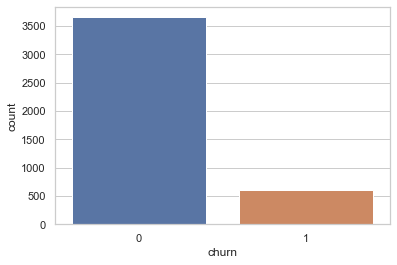

In [138]:
#### Now let us handle the dataset with imbalanced classes ####

sns.countplot(x="churn", data=train_hash);
plt.show();
# 0 -> No Churn, 1 -> Churn

In [139]:
x=train_hash.drop("churn", axis=1).values
y=train_hash.churn.values

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0);

In [140]:
print("Before Upsampling the count of class 0 {}".format(sum(y_train==0)));
print("Before Upsampling the count of class 1 {}".format(sum(y_train==1)));

Before Upsampling the count of class 0 2550
Before Upsampling the count of class 1 425


In [142]:
## Upsampling the Minority class i.e class 1 -> Applied on the Training set only ##
 # Synthetic Minority Oversampling Technique (SMOTE) #
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

sm=SMOTE(sampling_strategy=1);
x_train_smote, y_train_smote=sm.fit_resample(x_train, y_train);

print("After Upsampling {}".format(sum(y_train_smote==0))); # class 0
print("After Upsampling {}".format(sum(y_train_smote==1))); # class 1


After Upsampling 2550
After Upsampling 2550


In [143]:
#### Scaling the Dataset ####

scaler=MinMaxScaler();
x_train_smote_scale=scaler.fit_transform(x_train_smote);
x_test_scale=scaler.fit_transform(x_test);


In [144]:
#### Implementing Machine Learning and Neural Networks Models ####

# RandomForest Classifier #
rfc=RandomForestClassifier(n_jobs=-1);
rfc.fit(x_train_smote_scale, y_train_smote);

print(accuracy_score(y_test, rfc.predict(x_test_scale)));
# 91.5% --> Random Forest Classifier


0.9129411764705883


In [146]:
test=rfc.predict(x_test_scale);

In [147]:
print(classification_report(y_test, test));

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1102
           1       0.80      0.47      0.60       173

    accuracy                           0.91      1275
   macro avg       0.86      0.73      0.77      1275
weighted avg       0.91      0.91      0.90      1275



In [ ]:
# From above, it is clear that the precision value for 2nd dataset is much better than on the 1st dataset.

In [148]:
### Artificial Neural Networks ###

model=Sequential();

model.add(Dense(28, input_dim=x_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()));
model.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal())); # Glorot Normal (or) Xavier Normal

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]);
model.fit(x_train_smote_scale, y_train_smote,epochs=100,batch_size=100);


Epoch 1/100
51/51 [==============================] - 1s 2ms/step - loss: 0.7359 - accuracy: 0.5039
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6118
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.6912
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.7298
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7639
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7859
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7908
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8004
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8094
Epoch 10/100
51/51 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.8153
Epoch 11/

In [149]:
test = [round(x[0]) for x in model.predict(x_test_scale)];
print(accuracy_score(y_test, test)); # Testing accuracy score of 84.5%


0.8352941176470589


In [ ]:
## Analysis on the output by modifying the parameters ##

# epochs -> 20 - 0.8559%
# epochs -> 40 - 0.9192% batch size 100, 93.9% batch size 500, 94.3% batch size 1000, 
 # but if the batch size is more than 1000 there is no much difference in accuracy score

# epochs -> 100, size=1000, 95%

# When we declare using weight initialisation techniques ##
 # no of epochs : 100, batch size 100, training 91.4%, testing 86.7%



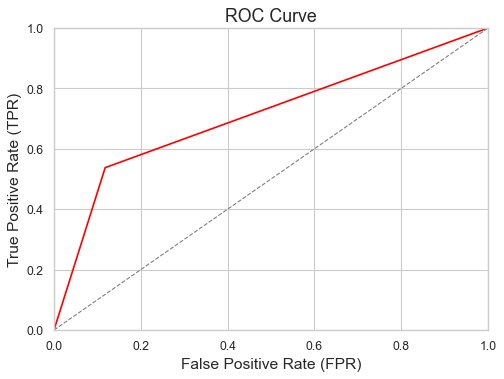

In [150]:
# AUC (&) ROC Curve:-
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test);
test_roc_auc=auc(test_fpr, test_tpr);

plt.figure(figsize=(7,5), dpi=80);
plt.plot(test_fpr, test_tpr, color="red",label='ROC curve for train set (area = %0.4f)' % test_roc_auc);
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.0]);
plt.xlabel("False Positive Rate (FPR)", fontsize=14);
plt.ylabel("True Positive Rate (TPR)", fontsize=14);
plt.title("ROC Curve", fontsize=16);
plt.show();

In [151]:
# To store the session
dill.dump_session('./your_bk_dill.pkl')
# To restore session:
dill.load_session('./your_bk_dill.pkl')


2021-12-16 15:59:50.925131: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://2461ece5-f345-4a3d-b0dc-00b1408969a0/assets


########################################### END ###################################################################